In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv("results/nels_11-11-22_seed_0_gradient_type_partial_deriv_loss_beta_train.csv")
df2 = pd.read_csv("results/nels_11-11-22_seed_0_gradient_type_total_deriv_train.csv")

In [4]:
def conversion_method(arr):
    l = []
    for s in arr:
        t = s[1:-1].split(", ")
        t = [float(x) for x in t]
        l.append(np.array(t).reshape(10, 1))
    return l

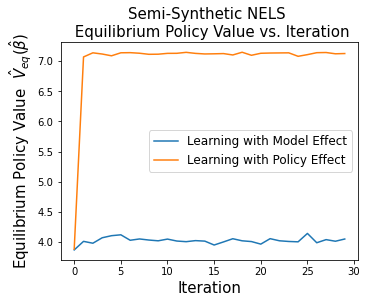

In [5]:
plt.figure(figsize=(16/3, 4))
plt.plot(df1["iteration"], -df1["loss"], label="Learning with Model Effect")
plt.plot(df2["iteration"], -df2["loss"], label="Learning with Policy Effect")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Equilibrium Policy Value  " + r"$\hat{V}_{eq}(\hat{\beta})$", fontsize=15)
plt.legend(fontsize=12)
plt.title("Semi-Synthetic NELS \n Equilibrium Policy Value vs. Iteration", fontsize=15)
plt.savefig("figs/paper-figure-6.pdf", bbox_inches='tight')